In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [70]:
pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [2]:
data=pd.read_csv("C2_2017_Yellow_Taxi_Trip_Data.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df.shape

(22699, 18)

In [ ]:
df.dtypes

In [6]:
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

In [ ]:
df.dtypes

In [7]:
df["duration"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]

In [8]:
df["duration"]=df["duration"].dt.total_seconds()/60

In [9]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [10]:
df=df[["passenger_count","trip_distance","payment_type","fare_amount","duration"]]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   trip_distance    22699 non-null  float64
 2   payment_type     22699 non-null  int64  
 3   fare_amount      22699 non-null  float64
 4   duration         22699 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 886.8 KB


In [12]:
df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [13]:
df["passenger_count"].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [14]:
df=df[df["passenger_count"]>0]

In [15]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,6,3.34,1,13.0,14.066667
1,1,1.80,1,16.0,26.500000
2,1,1.00,1,6.5,7.200000
3,1,3.70,1,20.5,30.250000
4,1,4.37,2,16.5,16.716667
...,...,...,...,...,...
22694,3,0.61,2,4.0,3.266667
22695,1,16.71,1,52.0,40.800000
22696,1,0.42,2,4.5,4.133333
22697,1,2.36,1,10.5,11.933333


In [16]:
df["payment_type"].value_counts()

1    15238
2     7261
3      121
4       46
Name: payment_type, dtype: int64

In [17]:
df=df[df["payment_type"]<3]

In [18]:
df["passenger_count"].value_counts(normalize=True)*100

1    71.034268
2    14.591760
5     5.075781
3     4.213521
6     3.075692
4     2.008978
Name: passenger_count, dtype: float64

In [19]:
df["payment_type"].replace([1,2],["Credit Card","Cash"],inplace=True)
df

C:\Users\SIDDHIKA\AppData\Local\Temp\ipykernel_18624\1326108745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["payment_type"].replace([1,2],["Credit Card","Cash"],inplace=True)


,passenger_count,trip_distance,payment_type,fare_amount,duration
0,6,3.34,Credit Card,13.0,14.066667
1,1,1.80,Credit Card,16.0,26.500000
2,1,1.00,Credit Card,6.5,7.200000
3,1,3.70,Credit Card,20.5,30.250000
4,1,4.37,Cash,16.5,16.716667
...,...,...,...,...,...
22694,3,0.61,Cash,4.0,3.266667
22695,1,16.71,Credit Card,52.0,40.800000
22696,1,0.42,Cash,4.5,4.133333
22697,1,2.36,Credit Card,10.5,11.933333


In [20]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,22499.000000,22499.000000,22499.000000,22499.000000
mean,1.647273,2.912382,13.035857,16.992748
std,1.287410,3.644704,13.203181,61.573829
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,6.683333
50%,1.000000,1.610000,9.500000,11.183333
75%,2.000000,3.060000,14.500000,18.383333
max,6.000000,33.960000,999.990000,1439.550000


In [21]:
df=df[df["trip_distance"]>0]
df=df[df["fare_amount"]>0]
df=df[df["duration"]>0]

In [22]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,6,3.34,Credit Card,13.0,14.066667
1,1,1.80,Credit Card,16.0,26.500000
2,1,1.00,Credit Card,6.5,7.200000
3,1,3.70,Credit Card,20.5,30.250000
4,1,4.37,Cash,16.5,16.716667
...,...,...,...,...,...
22694,3,0.61,Cash,4.0,3.266667
22695,1,16.71,Credit Card,52.0,40.800000
22696,1,0.42,Cash,4.5,4.133333
22697,1,2.36,Credit Card,10.5,11.933333


In [23]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,22374.000000,22374.000000,22374.000000,22374.000000
mean,1.648252,2.928337,12.966997,17.080263
std,1.288350,3.648294,12.659387,61.733191
min,1.000000,0.010000,2.500000,0.016667
25%,1.000000,1.000000,6.500000,6.733333
50%,1.000000,1.630000,9.500000,11.241667
75%,2.000000,3.090000,14.500000,18.450000
max,6.000000,33.960000,999.990000,1439.550000


In [ ]:
plt.boxplot(df["duration"])
#plt.boxplot(df["trip_distance"])
#plt.boxplot(df["fare_amount"])

In [24]:
for col in ["fare_amount","trip_distance","duration"]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    lower_bound=q1-1.5*(q3-q1)
    upper_bound=q3+1.5*(q3-q1)
    df=df[(df[col]>=q1) & (df[col]<=q3)]

In [25]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
8,1,1.20,Cash,9.0,12.116667
17,2,1.71,Credit Card,9.5,12.200000
31,4,1.50,Cash,9.0,11.550000
34,1,1.70,Credit Card,10.5,13.150000
39,1,1.28,Credit Card,7.5,8.716667
...,...,...,...,...,...
22672,1,1.40,Credit Card,9.0,11.233333
22678,1,2.09,Credit Card,8.5,8.366667
22681,1,1.79,Credit Card,9.5,11.433333
22684,2,1.20,Credit Card,8.0,9.850000


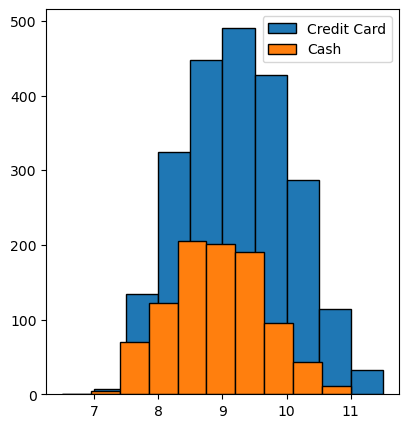

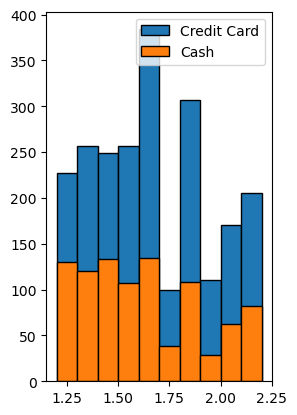

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df[df["payment_type"]=="Credit Card"]["fare_amount"],histtype="barstacked" ,edgecolor="k",label="Credit Card")
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"],histtype="barstacked",edgecolor="k",label="Cash")
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.hist(df[df["payment_type"]=="Credit Card"]["trip_distance"],histtype="barstacked" ,edgecolor="k",label="Credit Card")
plt.hist(df[df["payment_type"]=="Cash"]["trip_distance"],histtype="barstacked",edgecolor="k",label="Cash")
plt.legend()
plt.show()

In [42]:
df.groupby("payment_type").agg({"fare_amount":['mean','std'],"trip_distance":['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Cash            8.931144  0.821261      1.607903  0.290106
Credit Card     8.987649  0.829497      1.649665  0.285192

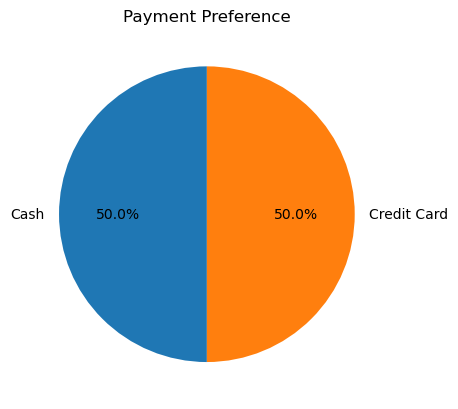

In [112]:
plt.title('Payment Preference')
plt.pie(df['payment_type'].value_counts(normalize=True),labels =df['payment_type'].value_counts().index
       ,startangle=90,autopct="%1.1f%%")
plt.show()

In [113]:
passenger_count=df.groupby(["payment_type",'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

KeyError: "Columns not found: 'passenger_count'"

In [107]:
passenger_count['pert']=(passenger_count['count']/passenger_count['count'].sum())*100


In [59]:
passenger_count

,payment_type,passenger_count,count,pert
0,Cash,1,635,19.775771
1,Cash,2,151,4.702585
2,Cash,3,35,1.090003
3,Cash,4,32,0.996574
4,Cash,5,57,1.775148
5,Cash,6,34,1.058860
6,Credit Card,1,1614,50.264715
7,Credit Card,2,324,10.090315
8,Credit Card,3,99,3.083152
9,Credit Card,4,47,1.463718


In [103]:
df=pd.DataFrame(columns=['payment_type',1,2,3,4,5,6])
df['payment_type']=['Cash','Credit Card']

df.iloc[0,1:]=passenger_count.iloc[0:6,-1]
df.iloc[1,1:]=passenger_count.iloc[6:,-1]



<Axes: ylabel='payment_type'>

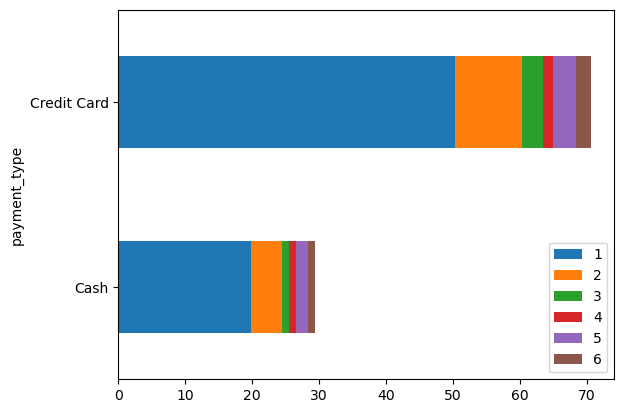

In [104]:
df.plot(x='payment_type',kind='barh',stacked=True)

null hypo
alternate hypo

In [105]:
df[df['payment_type'] =='Cash']["fare_amount"]
df[df['payment_type'] =='Credit Card']['fare_amount']

KeyError: 'fare_amount'

In [97]:
t_stats,p_value = st.ttest_ind(a = card_sample,b = cash_sample,equal_var=False)


NameError: name 'stats' is not defined

In [ ]:
t_stats,p-value